<a href="https://colab.research.google.com/github/khac/DevSOM/blob/master/DevFull_learning_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
!pip install minisom
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt


  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=9cfe04c1a97d7302fb4c0af3440855f0368d775d6bd52be31a4e766c68c5d53e
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [0]:
def mnist_data_assignment():
  """
  :return: X,y is the MNIST dataset containing the 70,000 digits and corresponding labels
  :rtype: numpy.ndarray,numpy.ndarray
  """
  X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
  X = X / 255.
  return X,y

In [0]:
X,y = mnist_data_assignment()


In [0]:
X.shape

(70000, 784)

In [0]:
X_600, y_600, X_6000, y_6000 = [], [], [], []

for i in range(10):
  X_600.append(X[y==str(i)][:60])
  y_600 += [str(i)]*60
  X_6000.append(X[y==str(i)][:600])
  y_6000 += [str(i)]*600

X_600 = np.array(X_600).reshape(600,784)
X_6000 = np.array(X_6000).reshape(6000,784)
y_600 = np.array(y_600) 
y_6000 = np.array(y_6000)

In [0]:
np.random.seed(0)
np.random.shuffle(X_600)
np.random.seed(0)
np.random.shuffle(X_6000)
np.random.seed(0)
np.random.shuffle(y_600)
np.random.seed(0)
np.random.shuffle(y_6000)

In [0]:
sigma6 = 'sigma6'; sigma12 = 'sigma12'; sigma24 = 'sigma24';
tau6 = 'tau6'; tau12 = 'tau12'; tau24 = 'tau24';

PARAM ={sigma6:3.0,     tau6:0.1,
        sigma12:2.25,    tau12:0.05,
        sigma24:1.5,    tau24:0.025}

X_train = X[:60000]; y_train = y[:60000]; X_test = X[60000:70000]; y_test = y[60000:70000] 

In [0]:
from minisom import MiniSom    
import time
start_time = time.time()
som_6x6 = MiniSom(6, 6, 784, sigma=PARAM[sigma6], learning_rate=PARAM[tau6]) # initialization of 12x12 SOM
som_6x6.train_random(X[:60000], 300000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

 [ 300000 / 300000 ] 100% - 0:00:00 left 
 quantization error: 0.05615125435576555
 topographic error: 0.00645
--- 170.28519296646118 seconds ---


In [0]:
x = som_6x6._weights.copy()
x = np.repeat(x, 2, axis=1)
x = np.repeat(x, 2, axis=0)
random_matrix = np.random.rand(12,12,784)*0.1 - 0.1
x = x + random_matrix

In [0]:
start_time = time.time()
som_12x12 = MiniSom(12, 12, 784, sigma=PARAM[sigma12], learning_rate=PARAM[tau12]) # initialization of 12x12 SOM
som_12x12._weights = x.copy()
som_12x12.train_random(X[:60000], 300000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

 [ 300000 / 300000 ] 100% - 0:00:00 left 
 quantization error: 0.04370576161602002
 topographic error: 0.021116666666666666
--- 450.77081418037415 seconds ---


In [0]:
x1 = som_12x12._weights.copy()
x1 = np.repeat(x1, 2, axis=1)
x1 = np.repeat(x1, 2, axis=0)
random_matrix1 = np.random.rand(24, 24,784)*0.1 - 0.1
x1 = x1 + random_matrix1

In [0]:
start_time = time.time()
som_24x24 = MiniSom(24, 24, 784, sigma=PARAM[sigma24], learning_rate=PARAM[tau24]) # initialization of 12x12 SOM
som_24x24._weights = x1.copy()
som_24x24.train_random(X[:60000], 300000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

 [ 300000 / 300000 ] 100% - 0:00:00 left 
 quantization error: 0.03367674931524609
 topographic error: 0.04841666666666666
--- 1645.3890988826752 seconds ---


# Weights of the SOFM

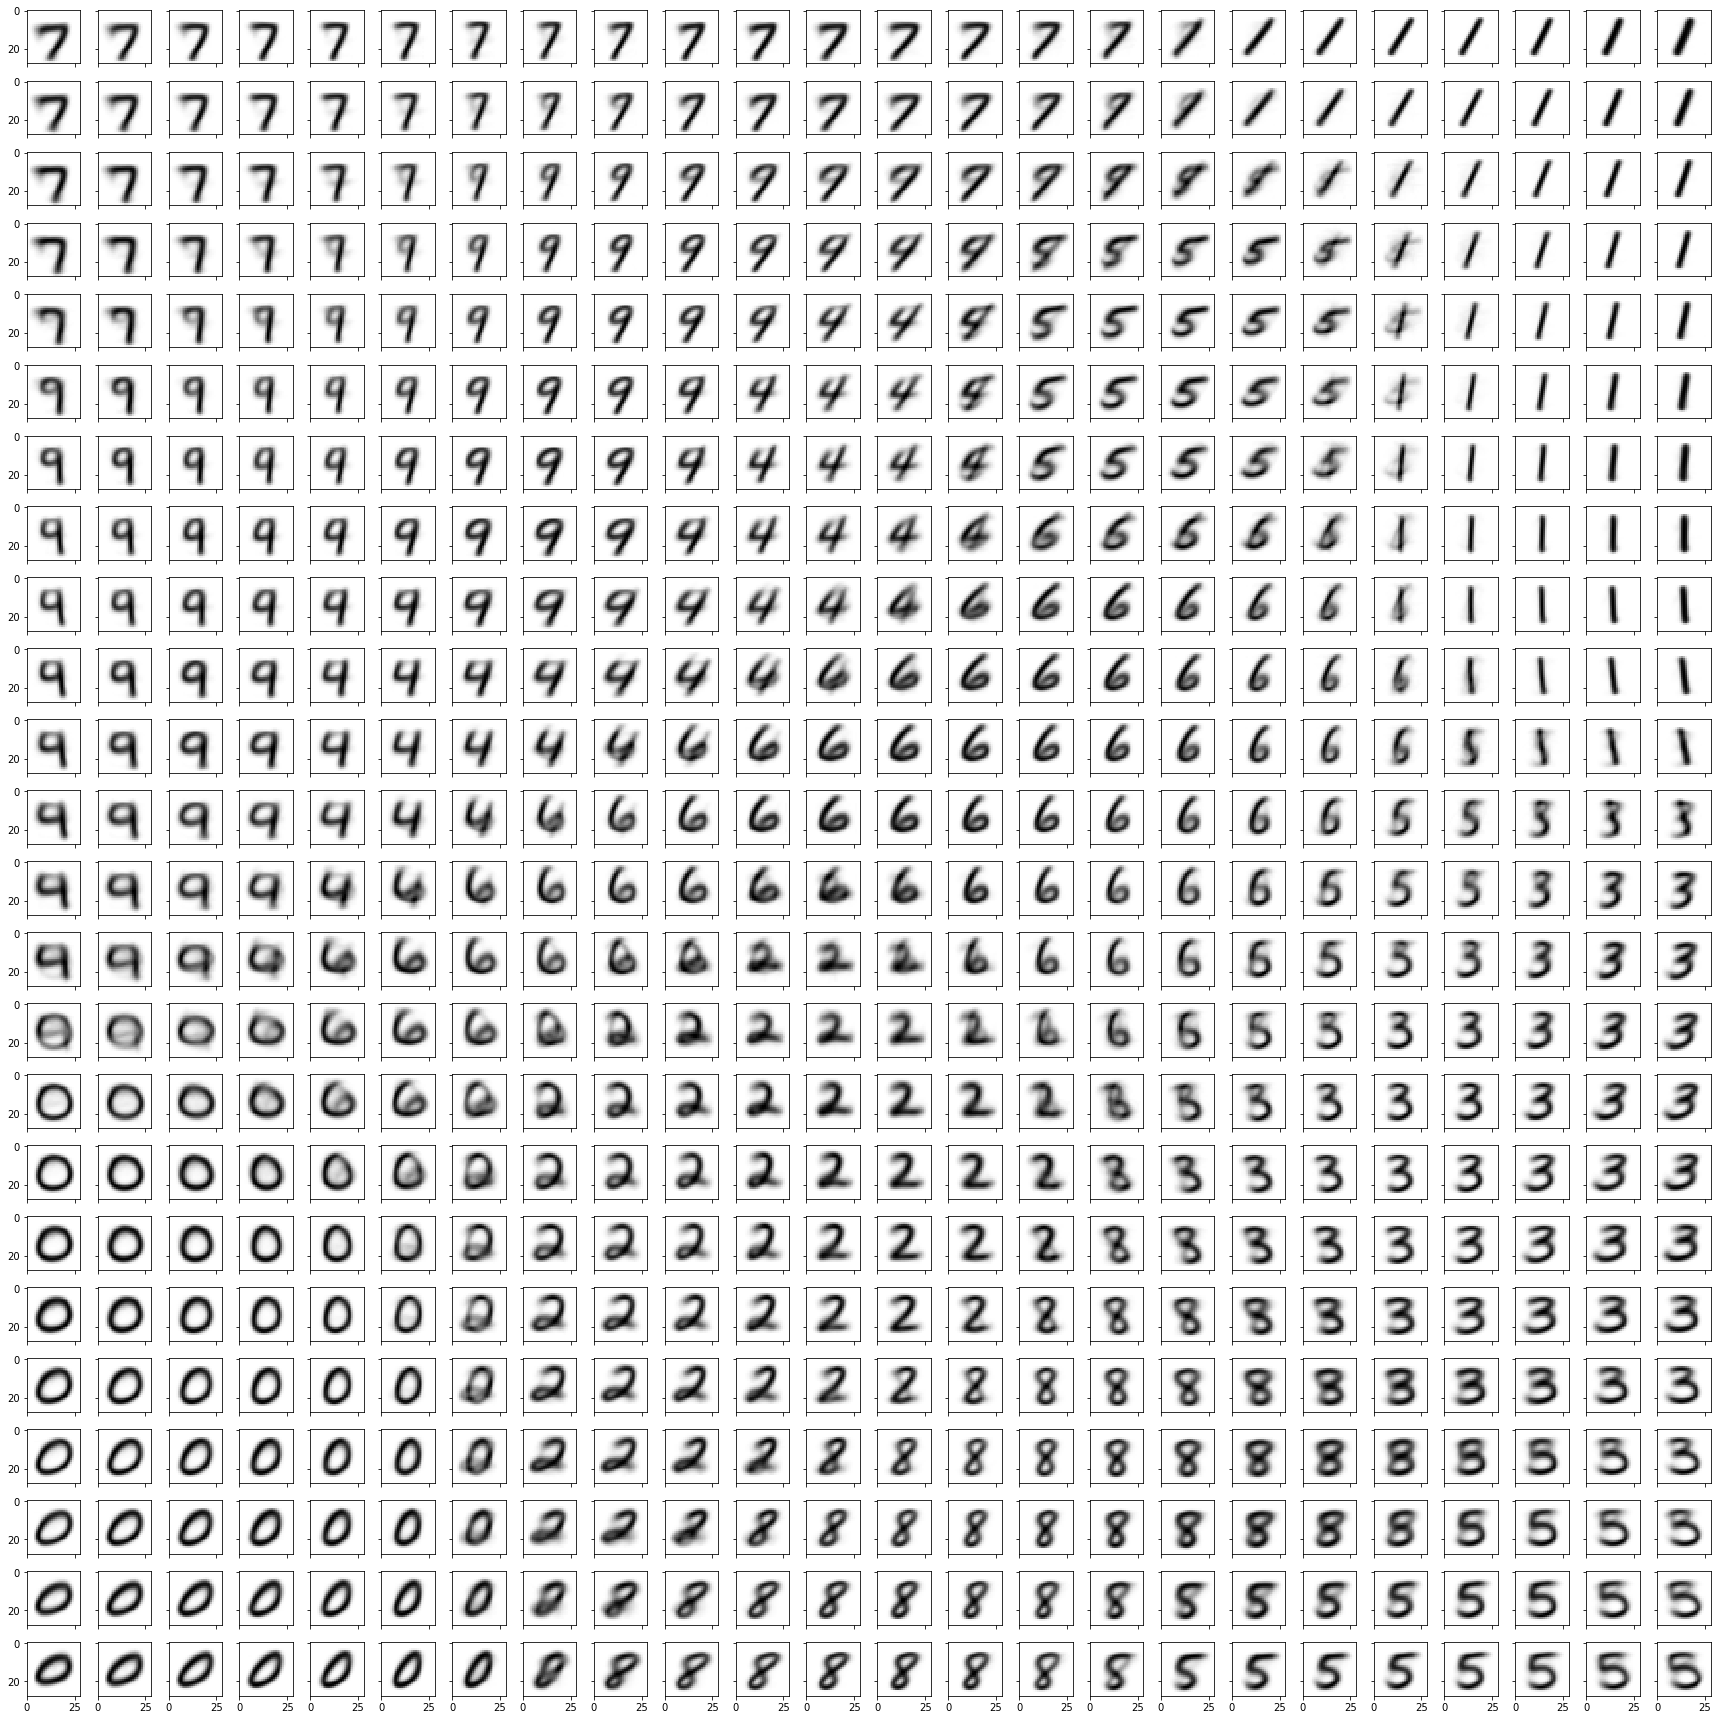

In [0]:
weight_developed = som_24x24.get_weights().reshape(24*24,28,28).copy()
ig, axes = plt.subplots(24,24, 
                         figsize=(24,24),
                         sharex=True, sharey=True)

for i in range(24*24):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//24 
    subplot_col = i%24  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = weight_developed[i]
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

# Entropy Heatmap

In [0]:
def dict_for_entropy(som, X, y):
  dict_winner_neuron = {}
  for i in range(10):
    x_i = y==str(i)
    for x, t in zip(X[x_i], y[x_i]):  # scatterplot
        w = som.winner(x)
        if w not in dict_winner_neuron:
          dict_winner_neuron[w] = {}
          if i not in dict_winner_neuron[w]:
            dict_winner_neuron[w][i] = 1
        elif i not in dict_winner_neuron[w]:
          dict_winner_neuron[w][i] = 1
        else:
          dict_winner_neuron[w][i] += 1
  return dict_winner_neuron

In [0]:
import plotly.express as px

def heatmap_entropy(dict_winner_neuron, size):
  map_132 = pd.DataFrame(np.zeros((size, size)), index=range(0,size), columns=range(0,size))
  for i in dict_winner_neuron:
      _sum_winner_neuron = sum(dict_winner_neuron[i].values())
      digits = list(dict_winner_neuron[i].values())
      map_132[i[0]][i[1]] = sum([-(j/_sum_winner_neuron)*np.log(j/_sum_winner_neuron) for j in digits])
    
  if size<12:
    z_text = np.around(map_132.values, decimals=3)
    fig = ff.create_annotated_heatmap(z = map_132.values, annotation_text=z_text, colorscale='hot', showscale=True, zmin=0, zmax=2, reversescale=True)
    fig.update_layout(
      autosize=False,
      width= 75*size if 75*size < 900 else 900 ,
      height=75*size if 75*size < 900 else 900)
    fig.show()
  else:
      num = list(range(1, size+1))
      fig1 = go.Figure(data=go.Heatmap(z=map_132.values, x=[], y=[], colorscale='hot', showscale=True, zmin=0, zmax=2, reversescale=True ))
      fig1.update_layout(
        autosize=False,
        width=900 ,
        height=900)
      fig1.show()


In [0]:
dict_winner_neuron = dict_for_entropy(som_24x24, X, y)
print(dict_winner_neuron)
heatmap_entropy(dict_winner_neuron, 24)

{(21, 2): {0: 140, 2: 6, 9: 1}, (23, 6): {0: 144, 2: 3, 3: 2, 5: 3, 6: 2, 8: 2}, (23, 5): {0: 127, 3: 1, 6: 1, 8: 1}, (19, 1): {0: 109}, (17, 2): {0: 104, 8: 1}, (21, 3): {0: 153, 2: 2, 6: 1, 9: 2}, (15, 0): {0: 203, 3: 1, 5: 2, 8: 4}, (20, 5): {0: 222, 5: 1, 6: 3, 9: 1}, (21, 4): {0: 100, 2: 1, 6: 1, 9: 1}, (22, 5): {0: 109, 2: 1, 5: 2, 6: 2}, (21, 5): {0: 155, 6: 6, 8: 2}, (15, 1): {0: 68, 5: 3, 6: 4, 7: 1, 8: 1}, (18, 0): {0: 200, 6: 1, 8: 1, 9: 1}, (19, 4): {0: 93, 5: 1, 7: 1}, (22, 2): {0: 121, 8: 1}, (17, 0): {0: 109, 9: 1}, (21, 0): {0: 156, 2: 1, 6: 1}, (20, 4): {0: 108}, (16, 0): {0: 169}, (18, 5): {0: 102, 2: 4, 5: 5, 6: 6, 9: 1}, (19, 5): {0: 149, 2: 1}, (16, 1): {0: 82, 9: 1}, (13, 16): {0: 8, 2: 2, 4: 1, 5: 8, 6: 72, 8: 9}, (14, 2): {0: 82, 2: 5, 3: 4, 5: 1, 6: 17, 7: 14, 9: 2}, (17, 1): {0: 78}, (19, 2): {0: 116}, (17, 5): {0: 51, 2: 5, 3: 1, 6: 6, 8: 1}, (22, 3): {0: 103}, (16, 2): {0: 85, 3: 1, 5: 1, 9: 1}, (18, 2): {0: 102}, (22, 1): {0: 95, 2: 2}, (22, 0): {0: 123, 6:

# Normalized Metric

In [0]:
def m_xy(winner_neurons_dict):
  return_dict = {}
  for i in winner_neurons_dict.keys():
    x = 0 
    for j in winner_neurons_dict[i].keys():
      x += winner_neurons_dict[i][j]
    return_dict[i] = x
  return return_dict
    

In [0]:
def normalized_metric(winner_neurons_dict, num_elements_per_class):
  m_xy1 = m_xy(winner_neurons_dict)
  return_dict, p_xy, q_xy, pq_xy = {}, {}, {}, {}
  for i in winner_neurons_dict.keys():
    if i not in p_xy:
      p_xy[i] = {}
    if i not in q_xy:
      q_xy[i] = {}
    if i not in pq_xy:
      pq_xy[i] = {}
    for j in winner_neurons_dict[i].keys():
      if j not in p_xy:
        p_xy[i][j] = float(winner_neurons_dict[i][j])/float(num_elements_per_class[j])
      if j not in q_xy:
        q_xy[i][j] = float(winner_neurons_dict[i][j])/float(m_xy1[i])
      if j not in pq_xy:
        pq_xy[i][j] = p_xy[i][j]*q_xy[i][j]
      if j not in return_dict:
        return_dict[j] = pq_xy[i][j]
      return_dict[j] += pq_xy[i][j]
  ret_val = 0
  for i in return_dict:
    ret_val += return_dict[i]
  return ret_val/len(return_dict.keys())


In [0]:
num_elements_per_class_train = {}
num_elements_per_class_test = {}
for j in range(10):
  x = 0
  for i in y_train==str(j):
    if i:
      x += 1
  num_elements_per_class_train[j]=x
  x = 0
  for i in y_test==str(j):
    if i:
      x += 1
  num_elements_per_class_test[j]=x

In [0]:
dict_winner_neuron_train = dict_for_entropy(som_24x24,  X_train,  y_train)
dict_winner_neuron_test  = dict_for_entropy(som_24x24,  X_test,   y_test)

In [0]:
dict_6x6_train = dict_for_entropy(som_6x6,  X_train,  y_train)
dict_6x6_test = dict_for_entropy(som_6x6,  X_test,  y_test)

In [0]:
dict_12x12_train = dict_for_entropy(som_12x12,  X_train,  y_train)
dict_12x12_test = dict_for_entropy(som_12x12,  X_test,  y_test)

In [0]:
print(normalized_metric(dict_6x6_train, num_elements_per_class_train), 
      normalized_metric(dict_6x6_test, num_elements_per_class_test))
print(normalized_metric(dict_12x12_train, num_elements_per_class_train), 
      normalized_metric(dict_12x12_test, num_elements_per_class_test))


0.45514455591427455 0.4657005974280387
0.6526178908014305 0.6674934686287892


In [0]:
print(normalized_metric(dict_winner_neuron_train, num_elements_per_class_train), 
      normalized_metric(dict_winner_neuron_test, num_elements_per_class_test))

0.8135678555259718 0.8354864010639143


# **Classification Metrics**

For each neuron, assign it the class it gets activated, this will be a dict,

with key - as tuple (x, y) of the location of neuron on the grid, whereas, value will be the class value for which it gets activated the most

---

Now, traverse through X_test and 

create two lists y_true and y_pred depending 

on the location on the grid (x, y) where the X_test gets activated

---

Get the confusion matrix, accuracy, precision and recall values

In [0]:
def majority_class_neuron(winner_neuron_dict):
  majority_dict = {}
  for location in winner_neuron_dict:
    majority_dict[location] = max(winner_neuron_dict[location], key=winner_neuron_dict[location].get)
  return majority_dict

In [0]:
def classification_metric(winner_neuron_dict, som, X_test):
  y_pred = []
  majority_class_nron = majority_class_neuron(winner_neuron_dict)
  for x_i in X_test:
    location = som.winner(x_i)
    y_pred.append(str(majority_class_nron[location]))
  return y_pred


In [0]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as accuracy

y_pred_som = classification_metric(dict_winner_neuron_test, som_24x24, X_test)
print(cm(y_test, y_pred_som), '\n', cr(y_test, y_pred_som), '\n', accuracy(y_test, y_pred_som))

NameError: ignored

In [0]:
def confusion_matrix_training(dict_winner):
  confusion_matrix = [[0 for i in range(10)] for j in range(10)]
  majority_class_nron = majority_class_neuron(dict_winner)
  for location in dict_winner:
    i = majority_class_nron[location]
    for j in dict_winner[location]:
      confusion_matrix[i][j] += dict_winner[location][j]
  i, j = 0, 0
  num, den = 0, 0
  for i in range(10):
    for j in range(10):
      if i==j:
        num += confusion_matrix[i][j]
      else:
        den += confusion_matrix[i][j]
      
  print(num/(num+den), confusion_matrix)
  return
    

In [0]:
print(confusion_matrix_training(dict_winner_neuron_train))

0.87595 [[5547, 0, 46, 15, 7, 34, 90, 18, 23, 20], [1, 6598, 57, 30, 49, 12, 11, 103, 82, 23], [39, 45, 5395, 123, 41, 20, 7, 52, 52, 20], [5, 26, 53, 5284, 6, 424, 2, 6, 340, 98], [11, 2, 41, 15, 4476, 36, 15, 79, 69, 735], [141, 11, 57, 264, 23, 4577, 74, 11, 398, 23], [142, 19, 46, 31, 117, 127, 5710, 4, 63, 12], [6, 10, 84, 49, 25, 10, 0, 5512, 19, 245], [29, 9, 138, 272, 20, 125, 6, 15, 4715, 30], [2, 22, 41, 48, 1078, 56, 3, 465, 90, 4743]]
None


In [0]:
y_test_cm_6x6 = classification_metric(dict_6x6_test, som_6x6, X_test)
print(cm(y_test, y_test_cm_6x6), '\n', cr(y_test, y_test_cm_6x6), '\n', accuracy(y_test, y_test_cm_6x6))

[[ 753    0  134   31    2    0   52    3    4    1]
 [   0 1079   16    0    0   19   13    3    5    0]
 [  42   49  536   23   29   10  206    8  128    1]
 [   2   12  122  596    1   10   13   31  216    7]
 [   1    3    2    1  455    8   87  197    6  222]
 [   5   13   67  383   43   45   34  235   52   15]
 [ 133   16  222   15   23    8  526    1   14    0]
 [   1   35   16    1   70   31   46  500    8  320]
 [   6   38  224  150   49   17   42  101  330   17]
 [   8    5    7    9  174   15   40  296    8  447]] 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       980
           1       0.86      0.95      0.90      1135
           2       0.40      0.52      0.45      1032
           3       0.49      0.59      0.54      1010
           4       0.54      0.46      0.50       982
           5       0.28      0.05      0.09       892
           6       0.50      0.55      0.52       958
           7       0.36      0.49 

In [0]:
print(confusion_matrix_training(dict_6x6_train))

0.5137833333333334 [[4767, 0, 473, 108, 14, 141, 888, 8, 69, 35], [0, 6387, 292, 145, 18, 89, 166, 169, 432, 33], [517, 11, 1617, 267, 9, 158, 860, 11, 410, 6], [192, 4, 209, 3648, 2, 2209, 139, 7, 981, 77], [11, 1, 199, 65, 2756, 312, 99, 522, 253, 1126], [1, 114, 42, 54, 66, 364, 54, 223, 138, 122], [355, 13, 1666, 85, 562, 233, 3402, 221, 378, 229], [12, 45, 48, 137, 807, 1121, 4, 2393, 399, 1293], [64, 165, 1404, 1517, 50, 434, 306, 103, 2510, 45], [4, 2, 8, 105, 1558, 360, 0, 2608, 281, 2983]]
None


In [0]:
y_test_cm_12x12 = classification_metric(dict_12x12_test, som_12x12, X_test)
print(cm(y_test, y_test_cm_12x12), '\n', cr(y_test, y_test_cm_12x12), '\n', accuracy(y_test, y_test_cm_12x12))

[[ 893    1    2   13    4   27   29    1   10    0]
 [   0 1116    4    9    0    2    2    0    2    0]
 [  23   24  862   21   25   17   19   20   21    0]
 [  25    2   33  772    2   68   10    8   82    8]
 [   3    6   12    3  629   14   41   35    1  238]
 [  70    1   10  189   28  442   21   17   92   22]
 [  38    2   13    0   14    6  882    1    2    0]
 [   4   34   11    2   29    4    1  906    0   37]
 [  20    5   46  101   34   97    9   36  614   12]
 [  18   12    2   13  271   16    2  120    5  550]] 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       980
           1       0.93      0.98      0.95      1135
           2       0.87      0.84      0.85      1032
           3       0.69      0.76      0.72      1010
           4       0.61      0.64      0.62       982
           5       0.64      0.50      0.56       892
           6       0.87      0.92      0.89       958
           7       0.79      0.88 

In [0]:
print(confusion_matrix_training(dict_12x12_train))

0.7469833333333333 [[5260, 0, 56, 151, 3, 392, 106, 45, 68, 65], [1, 6507, 104, 48, 66, 14, 11, 188, 91, 37], [46, 41, 4914, 216, 46, 74, 96, 27, 212, 22], [118, 29, 143, 4551, 8, 1388, 15, 15, 697, 86], [24, 2, 122, 43, 3706, 148, 37, 167, 146, 1743], [159, 20, 103, 372, 114, 2748, 153, 23, 777, 83], [258, 10, 189, 45, 220, 135, 5472, 9, 60, 26], [0, 38, 97, 75, 220, 33, 10, 5234, 168, 888], [52, 72, 210, 542, 107, 277, 17, 60, 3507, 79], [5, 23, 20, 88, 1352, 212, 1, 497, 125, 2920]]
None
